In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [3]:
df.drop(["CustomerID"], axis = 1, inplace=True)

#### Income Distribution

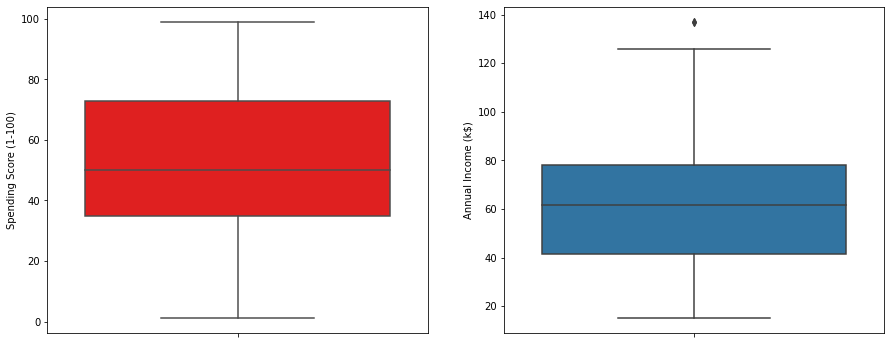

In [4]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")

plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

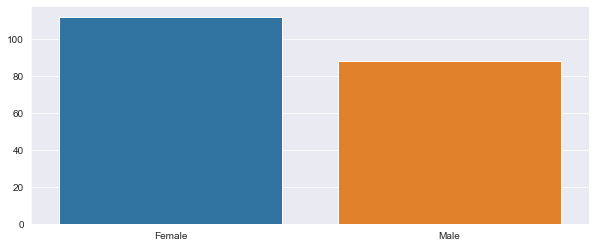

In [5]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [6]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

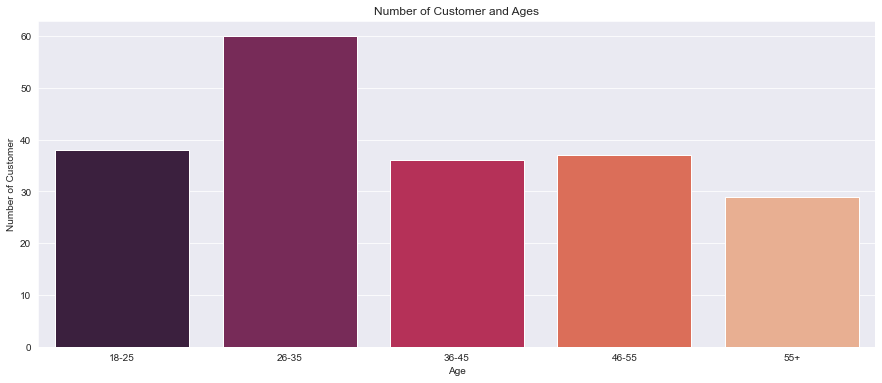

In [7]:
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

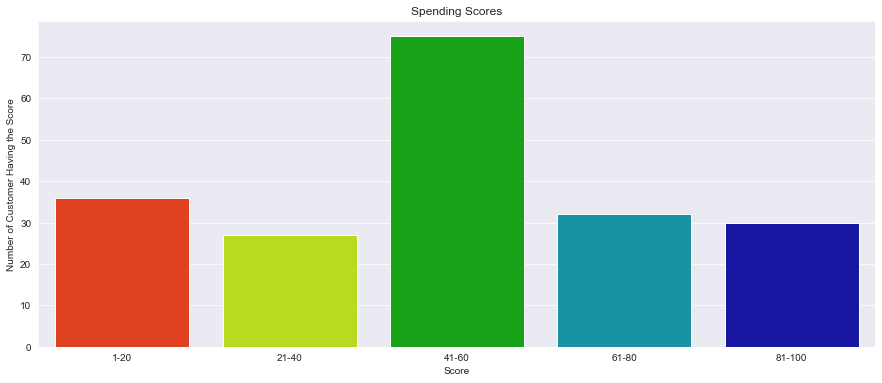

In [8]:

ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

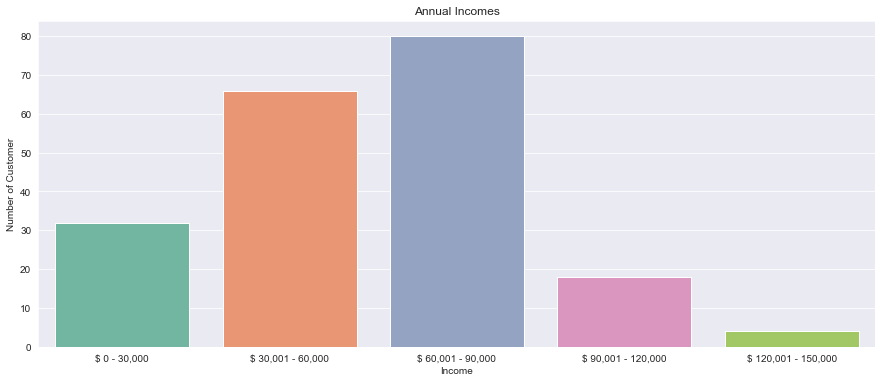

In [9]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

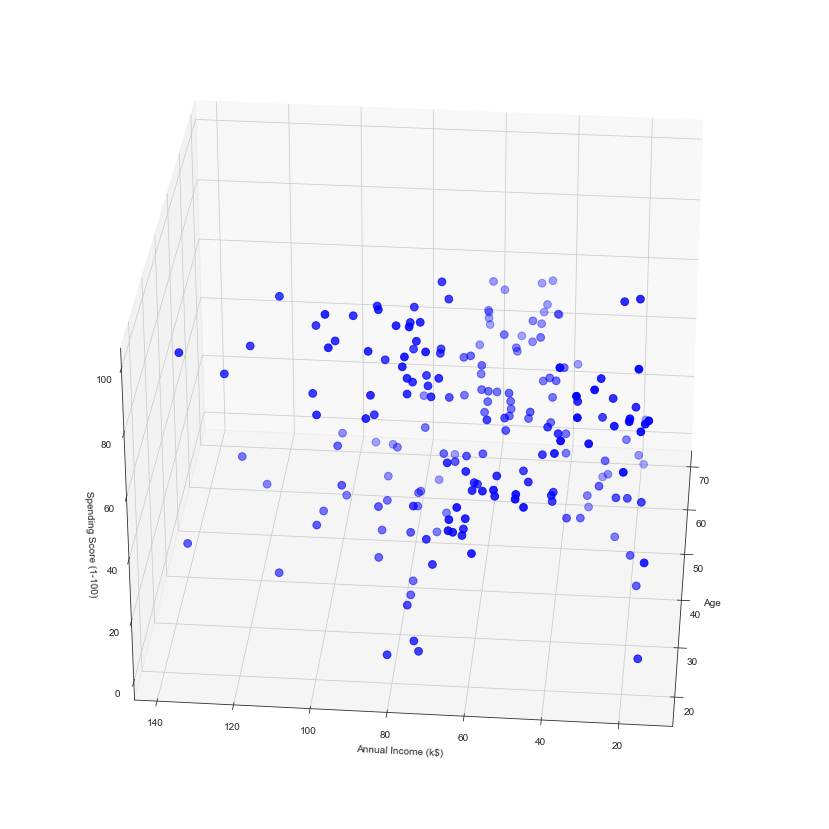

In [13]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [15]:
from sklearn.cluster import KMeans

### K Means with k=4

In [16]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df.iloc[:,1:])

print(' Inertia : ',kmeans.inertia_)

 Inertia :  104374.1598511286


### K Means with k=5

In [17]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df.iloc[:,1:])

print(' Inertia : ',kmeans.inertia_)

 Inertia :  75350.77917248776


### K Means with k=3

In [32]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df.iloc[:,1:])

print(' Inertia : ',kmeans.inertia_)

 Inertia :  143342.75157170597


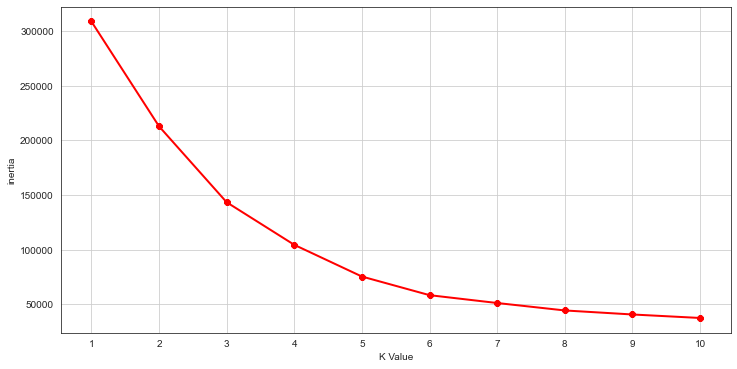

In [33]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),inertia, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("inertia")
plt.show()

#### Re-Cluster

In [34]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df.iloc[:,1:])

df['Cluster'] = kmeans.predict(df.iloc[:,1:])
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,2
197,Male,32,126,74,0
198,Male,32,137,18,2


#### Profile the Clusters

In [38]:
df.Cluster.value_counts()

1    123
0     39
2     38
Name: Cluster, dtype: int64

In [44]:
df[df['Cluster']==0].describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,39.000000,39.000000,39.000000,39.0
mean,32.692308,86.538462,82.128205,0.0
std,3.728650,16.312485,9.364489,0.0
min,27.000000,69.000000,63.000000,0.0
25%,30.000000,75.500000,74.500000,0.0
50%,32.000000,79.000000,83.000000,0.0
75%,35.500000,95.000000,90.000000,0.0
max,40.000000,137.000000,97.000000,0.0


In [41]:
df[df['Cluster']==0].describe().loc[['mean']]

,Age,Annual Income (k$),Spending Score (1-100),Cluster
mean,32.692308,86.538462,82.128205,0.0


#### This cluster represents a group of people with high income and high spending scores

In [42]:
df[df['Cluster']==1].describe().loc[['mean']]

,Age,Annual Income (k$),Spending Score (1-100),Cluster
mean,40.325203,44.154472,49.829268,1.0


#### This cluster represents a group of people with low income and medium spending scores

In [43]:
df[df['Cluster']==2].describe().loc[['mean']]

,Age,Annual Income (k$),Spending Score (1-100),Cluster
mean,40.394737,87.0,18.631579,2.0


### This cluster represents a group of people with high income and low spending scores